<a href="https://colab.research.google.com/github/WicfuL-io/google_colab/blob/main/Jaringan%20Syaraf%20Tiruan/uasJST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## import library

In [43]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error

## upload data

In [17]:
# Load dataset
df = pd.read_csv('data.csv')
print("Jumlah data awal:", df.shape)

Jumlah data awal: (297, 14)


In [18]:
# Tampilkan 5 data awal
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


## Cleaning Data

In [19]:
print("Jumlah data duplikat:", df.duplicated().sum())

Jumlah data duplikat: 0


In [20]:
print("Jumlah data sebelum hapus duplikat:", df.shape)
# menghapus data duplikat
df = df.drop_duplicates()
print("Jumlah data setelah hapus duplikat:", df.shape)

Jumlah data sebelum hapus duplikat: (297, 14)
Jumlah data setelah hapus duplikat: (297, 14)


In [22]:
# Cek missing value
print("\nMissing values per kolom:")
print(df.isnull().sum())


Missing values per kolom:
age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64


## final sebelum jst

In [24]:
# Ubah kolom 'condition' menjadi biner
df['condition'] = df['condition'].apply(lambda x: 1 if x > 0 else 0)

In [26]:
print(df['condition'])

0      0
1      0
2      0
3      1
4      0
      ..
292    1
293    1
294    1
295    0
296    1
Name: condition, Length: 297, dtype: int64


In [25]:
# Pisahkan fitur dan target
X = df.drop(columns='condition')
y = df['condition']

In [27]:
# Normalisasi data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [28]:
# Bagi data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [33]:
# Bangun model
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [34]:
# Kompilasi model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Tampilkan ringkasan arsitektur
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 16)             │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 369 (1.44 KB)

 Trainable params: 369 (1.44 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
history = model.fit(X_train, y_train, epochs=50, batch_size=16,
                    validation_data=(X_test, y_test), verbose=1)

Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.3874 - loss: 0.7148 - val_accuracy: 0.5833 - val_loss: 0.6941
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5026 - loss: 0.6947 - val_accuracy: 0.6000 - val_loss: 0.6859
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5872 - loss: 0.6759 - val_accuracy: 0.5833 - val_loss: 0.6777
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5983 - loss: 0.6744 - val_accuracy: 0.6000 - val_loss: 0.6695
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6659 - loss: 0.6502 - val_accuracy: 0.6333 - val_loss: 0.6594
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7069 - loss: 0.6340 - val_accuracy: 0.6167 - val_loss: 0.6481
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6924 - loss: 0.6193 - val_accuracy: 0.6500 - val_loss: 0.6372
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7292 - loss: 0.6016 - val_accuracy: 0.6833 - val_

### eda

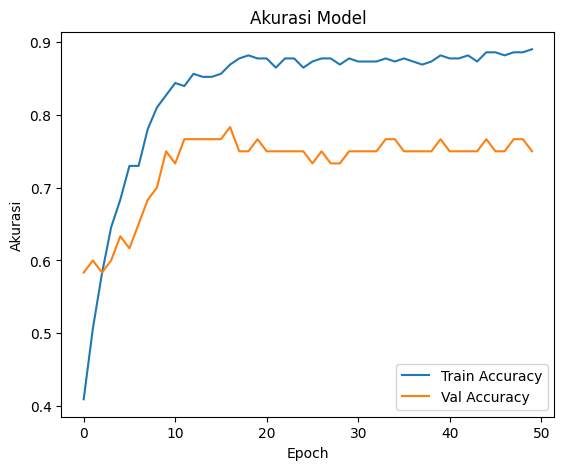

In [37]:
# Plot akurasi
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Akurasi Model')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend()

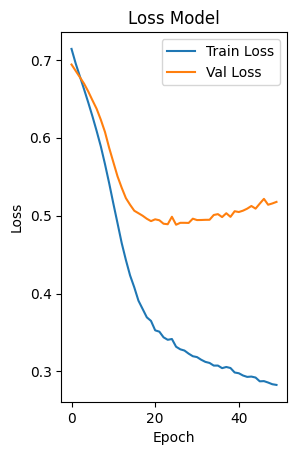

In [38]:
# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Model')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [40]:
# Prediksi data test
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype("int32")

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 165ms/step


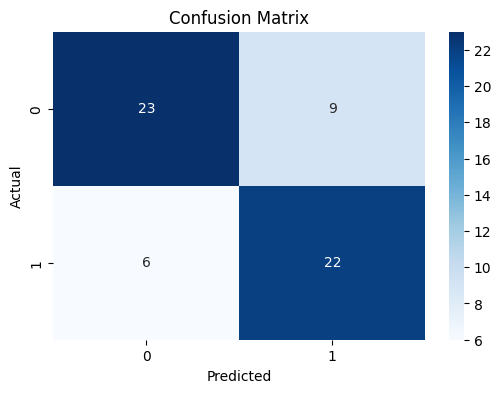

In [41]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [44]:
# Evaluasi numerik
acc = accuracy_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"Akurasi : {acc:.4f}")
print(f"MAE     : {mae:.4f}")
print(f"MSE     : {mse:.4f}")

Akurasi : 0.7500
MAE     : 0.2500
MSE     : 0.2500


In [42]:
# Classification Report
print(classification_report(y_test, y_pred, target_names=['Sehat', 'Risiko Penyakit']))

                 precision    recall  f1-score   support

          Sehat       0.79      0.72      0.75        32
Risiko Penyakit       0.71      0.79      0.75        28

       accuracy                           0.75        60
      macro avg       0.75      0.75      0.75        60
   weighted avg       0.75      0.75      0.75        60

